In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,text,inspect,func 

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

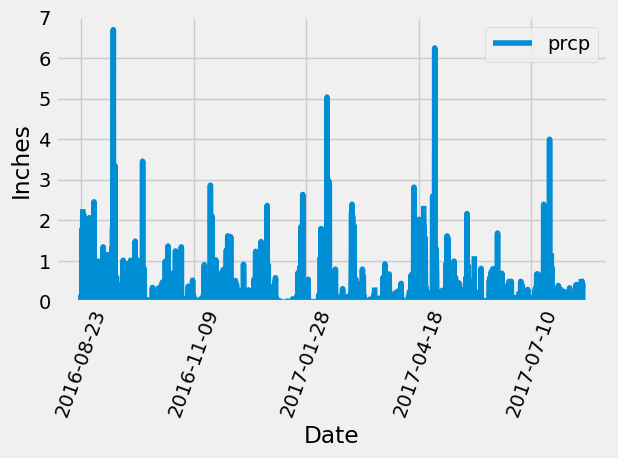

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
values = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > '2016-08-22').\
    order_by(measurement.date).all()

# Calculate the date one year from the last date in data set.
last_year = dt.datetime.strptime('2016-08-23', '%Y-%m-%d')

# Perform a query to retrieve the data and precipitation scores
results = session.query(func.count(measurement.id), measurement.date,func.avg(measurement.prcp))


# Save the query results as a Pandas DataFrame. Explicitly set the column names
values_df = pd.DataFrame(values)
values_final_df = values_df.set_index("date")
values_final_df

# Sort the dataframe by date
df = values_final_df.sort_values(['date'], ascending=[True])



# Use Pandas Plotting with Matplotlib to plot the data
values_final_df.plot()
plt.ylim(0,7)
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.show()


In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data
values_final_df.describe()


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset
session.query(station).count()

9

In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
columns = [measurement.station, func.count(measurement.id)]

active_stations_query = session.query(*columns).\
    group_by(measurement.station).\
    order_by(func.count(measurement.id).desc()).all()

active_stations = active_stations_query

print(active_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Define the columns to be selected
columns = [func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)]

most_active_station_data_query = session.query(*columns).\
    group_by(measurement.station).\
    order_by(func.count(measurement.id).desc()).first()

most_active_station_data = most_active_station_data_query

print(most_active_station_data)


(54.0, 85.0, 71.66378066378067)


In [ ]:
# Using the most active station id

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [ ]:
# Close Session
session.close()